In [21]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
tit_train = pd.read_csv ('./titanic/train.csv')

In [4]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit_train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
tit_train = tit_train.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [7]:
titanic_missing = tit_train.dropna()
titanic_missing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_with_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [15]:
x_columns = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
titanic_x = titanic_with_dummies[x_columns]
titanic_y = titanic_with_dummies["Survived"]
titanic_model = LogisticRegression()
titanic_model.fit(titanic_x, titanic_y)
titanic_model.score(titanic_x, titanic_y)

/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

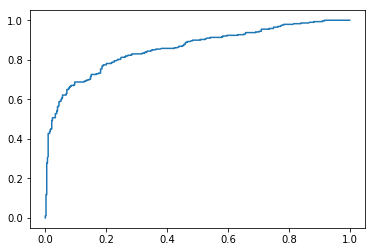

In [19]:
y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(titanic_y,  y_pred_proba)
auc = metrics.roc_auc_score(titanic_y, y_pred_proba)
plt.plot(fpr,tpr);


In [20]:
auc

0.8580319706498951